# **Veri Analizi**


## *Veri Setinin Tanımı:*

---



Bu veri seti, 33'ü doğrusal değerli ve biri nominal olan 34 öznitelik içerir.

Eritematöz skuamöz hastalıkların ayırıcı tanısı dermatolojide gerçek bir problemdir. Hepsi çok az farkla eritem ve ölçeklenmenin klinik özelliklerini paylaşır. Bu gruptaki hastalıklar sedef hastalığı, seboreik dermatit, liken planus, pityriasis rosea, kronik dermatit ve pityriasis rubra pilaris'dir.

Tanı için genellikle biyopsi gerekir ancak maalesef bu hastalıklar pek çok histopatolojik özelliği de paylaşmaktadır. Ayırıcı tanı için bir diğer zorluk, bir hastalığın başlangıç aşamasında başka bir hastalığın özelliklerini gösterebilmesi ve sonraki aşamalarda da karakteristik özelliklere sahip olabilmesidir.

Hastalar ilk olarak 12 özellik ile klinik olarak değerlendirilmiş. Ardından 22 histopatolojik özelliğin değerlendirilmesi için deri örnekleri alınmış. Histopatolojik özelliklerin değerleri, örneklerin mikroskop altında analizi ile belirlenmiştir.

Bu konu için oluşturulan veri setinde, aile öyküsü özelliği, bu hastalıklardan herhangi biri ailede görülmüşse 1, aksi halde 0 değerine sahiptir.

Yaş özelliği basitçe hastanın yaşını temsil eder. Diğer her özellik için (klinik ve histopatolojik), 0 ila 3 arasında bir derece verilmiştir.

Burada 0, özelliğin mevcut olmadığını, 3 olası en yüksek miktarı ve 1, 2 göreceli ara değerleri gösterir.


## *Veri Setinin İçeriği*

---



Veri örnek sayısı: 366   
Öznitelik sayısı: 34

Özniteliği eksik veri sayısı: 8 (yaş özniteliği eksik). Eksik veriler '?' ile temsil edilmiştir.

### Öznitelik Bilgileri:

---



**Klinik Öznitelikler: (0, 1, 2, 3) değerlerini alır**

*   1: erythema
*   2: scaling
*   3: definite borders
*   4: itching
*   5: koebner phenomenon
*   6: polygonal papules
*   7: follicular papules
*   8: oral mucosal involvement
*   9: knee and elbow involvement
*   10: scalp involvement
*   11: family history, (0 veya 1)
*   34: Age (linear)

**Histopatolojik Öznitelikler: (0, 1, 2, 3) değerlerini alır**
*   12: melanin incontinence
*   13: eosinophils in the infiltrate
*   14: PNL infiltrate
*   15: fibrosis of the papillary dermis
*   16: exocytosis
*   17: acanthosis
*   18: hyperkeratosis
*   19: parakeratosis
*   20: clubbing of the rete ridges
*   21: elongation of the rete ridges
*   22: thinning of the suprapapillary epidermis
*   23: spongiform pustule
*   24: munro microabcess
*   25: focal hypergranulosis
*   26: disappearance of the granular layer
*   27: vacuolisation and damage of basal layer
*   28: spongiosis
*   29: saw-tooth appearance of retes
*   30: follicular horn plug
*   31: perifollicular parakeratosis
*   32: inflammatory monoluclear inflitrate
*   33: band-like infiltrate


**Sınıf Bilgisi: (1,2,3,4,5,6) değerlerini alır**
*   35 : class code

## *Data üzerinde işlem yapması*

---



### Dataseti çağırmak

---



In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('dermatology.data', sep=",", header=None, names=[x for x in range(1,36)])
print("Veri seti örneği:")
df.head()

Veri seti örneği:


,1,2,3,4,5,6,7,8,9,10,...,26,27,28,29,30,31,32,33,34,35
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


### Eksik veri kontrolu ve tamamlanması

---



Buradaki yaptığım işlem dataseti hedef sınıfına göre ayırdım, ondan sonra her sınıfın 34 sütünün ortalaması hesaplayıp boş olan değerlere atadım

In [2]:
temp_df = df[df[34] != '?']
temp_df[34] = pd.to_numeric(temp_df[34])
class_mean_values = temp_df.groupby([35]).mean()[34].values
class_mean_values = class_mean_values.astype('int')
print(class_mean_values)

[39 35 39 35 36 10]


C:\Users\Abdullah\AppData\Local\Temp/ipykernel_17604/3638470472.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df[34] = pd.to_numeric(temp_df[34])


In [3]:
for i in range(6):
    df.loc[(df[34] == '?') & (df[35] == i+1), 34] = class_mean_values[i]

df[34] = pd.to_numeric(df[34])
df.head(50)

,1,2,3,4,5,6,7,8,9,10,...,26,27,28,29,30,31,32,33,34,35
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3
5,2,3,2,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1,0,41,2
6,2,1,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,18,5
7,2,2,3,3,3,3,0,2,0,0,...,2,2,3,2,0,0,3,3,57,3
8,2,2,1,0,2,0,0,0,0,0,...,0,0,2,0,0,0,2,0,22,4
9,2,2,1,0,1,0,0,0,0,0,...,0,0,2,0,0,0,2,0,30,4


### Özniteliklerin sınıflamadaki ayırt ediciliklerinin hesaplanması:

---



In [4]:
array = df.values
X = array[:,0:34]
Y = array[:,34]

from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# feature extraction
test = SelectKBest(score_func=f_classif, k='all')
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
features = fit.transform(X)


Kolay okunması için büyükten küçüğe sıralayacağım:

In [5]:
scores = fit.scores_
feature_numbers = scores.argsort()
sorted_scores = np.sort(scores)[::-1] / scores.sum()

print("Feature Importances:")
for i in range(len(scores)):
    print(f'Feature {feature_numbers[i] +1}: {sorted_scores[i]}')

Feature Importances:
Feature 32: 0.14409160053589629
Feature 18: 0.10071923501621637
Feature 17: 0.087559408702455
Feature 13: 0.08621616879618128
Feature 1: 0.07519350627736006
Feature 34: 0.06637610007581414
Feature 11: 0.05792825867098661
Feature 2: 0.05462016732331319
Feature 19: 0.04418978625181611
Feature 23: 0.04389937831429659
Feature 4: 0.042773027129077254
Feature 26: 0.036177666049101616
Feature 5: 0.02964243326480463
Feature 3: 0.02640922799954623
Feature 14: 0.014120434364909774
Feature 24: 0.01354532911288131
Feature 10: 0.011136135798283884
Feature 28: 0.01108416686821952
Feature 16: 0.007858086736075373
Feature 9: 0.00634340853871296
Feature 7: 0.005306883309711785
Feature 30: 0.0044624481974810904
Feature 21: 0.0044397666779505685
Feature 22: 0.004086976098273841
Feature 20: 0.004016868531973653
Feature 8: 0.003681431832855444
Feature 25: 0.0034491543692828646
Feature 15: 0.0023209363144372584
Feature 12: 0.0019863895610051046
Feature 6: 0.001676500440539253
Feature 31

sonucunda: 0.001'den düşük ayırt edicilik skoruna sahip olan feature 33 değerlerinin veriden çıkartılmasına karar aldım.

In [6]:
df = df.drop([33], axis=1)
df.head()

,1,2,3,4,5,6,7,8,9,10,...,25,26,27,28,29,30,31,32,34,35
0,2,2,0,3,0,0,0,0,1,0,...,0,0,0,3,0,0,0,1,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,8,1
2,2,1,2,3,1,3,0,3,0,0,...,2,0,2,3,2,0,0,2,26,3
3,2,2,2,0,0,0,0,0,3,2,...,0,3,0,0,0,0,0,3,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,2,3,2,3,0,0,2,45,3


Veri setindeki 34 numaralı yaş özniteliği haricindeki öznitelikler, [0,1,2,3] değerlerini aldığından dolayı aykırı değer analizi veri setinin kullanılamaz hale gelmesine sebep olmaktadır.

In [7]:
lower_upper_bounds = []
for col in df.columns[:-1]: 
    data = df[col].tolist()

    q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    lower_upper_bounds.append((lower,upper))

Her özellik için aykırı değer analizi sonrası adım adım toplamda kaç veri kaldığı gösterilmiştir.

In [8]:
outlier_df = df
for index, col in enumerate(df.columns[:-1]):
    lower, upper = lower_upper_bounds[index]
    outlier_df = outlier_df[(outlier_df[col] >= lower) & (outlier_df[col] <= upper)]
    print(f'Özellik:{col} için aykırı değer analizi sonrası verisetinin şekli:{outlier_df.shape}')

Özellik:1 için aykırı değer analizi sonrası verisetinin şekli:(215, 34)
Özellik:2 için aykırı değer analizi sonrası verisetinin şekli:(215, 34)
Özellik:3 için aykırı değer analizi sonrası verisetinin şekli:(215, 34)
Özellik:4 için aykırı değer analizi sonrası verisetinin şekli:(215, 34)
Özellik:5 için aykırı değer analizi sonrası verisetinin şekli:(203, 34)
Özellik:6 için aykırı değer analizi sonrası verisetinin şekli:(163, 34)
Özellik:7 için aykırı değer analizi sonrası verisetinin şekli:(143, 34)
Özellik:8 için aykırı değer analizi sonrası verisetinin şekli:(142, 34)
Özellik:9 için aykırı değer analizi sonrası verisetinin şekli:(129, 34)
Özellik:10 için aykırı değer analizi sonrası verisetinin şekli:(125, 34)
Özellik:11 için aykırı değer analizi sonrası verisetinin şekli:(113, 34)
Özellik:12 için aykırı değer analizi sonrası verisetinin şekli:(113, 34)
Özellik:13 için aykırı değer analizi sonrası verisetinin şekli:(99, 34)
Özellik:14 için aykırı değer analizi sonrası verisetinin şekl

In [9]:
outlier_df

,1,2,3,4,5,6,7,8,9,10,...,25,26,27,28,29,30,31,32,34,35
0,2,2,0,3,0,0,0,0,1,0,...,0,0,0,3,0,0,0,1,55,2
9,2,2,1,0,1,0,0,0,0,0,...,0,0,0,2,0,0,0,2,30,4
70,2,2,2,1,0,0,0,0,0,0,...,0,0,0,2,0,0,0,1,34,2
76,2,2,2,1,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,33,2
82,2,1,1,2,0,0,0,0,0,0,...,0,0,0,3,0,0,0,3,27,2
96,2,2,1,2,0,0,0,0,0,0,...,0,0,0,3,0,0,0,2,35,2
116,2,2,1,2,0,0,0,0,0,0,...,0,0,0,2,0,0,0,2,27,2
140,2,2,1,2,2,0,0,0,0,0,...,0,0,0,2,0,0,0,2,20,2
148,2,2,2,0,2,0,0,0,0,0,...,0,0,0,2,0,0,0,1,30,4
149,2,3,0,2,0,0,0,0,0,0,...,0,0,0,2,0,0,0,1,45,2


Verisetindeki 33 özellik için aykırı değer analizi yapılmıştır. Elde edilen sonuçlarda başlangıçta 366 satır olan veri, 27 satıra düştüğü için aykırı değer analizi ile veri atılmamasına karar aldım.

# **Sınıflama**

### Kütüphaneleri çağırmak

---



In [10]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

### Veri öğrenme ve veri test grublara ayırmak

---



In [11]:
X = df.iloc[:,:-1].values  
y = df[35].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=28)

### Veri öğrenme grubu modelleme

---



In [12]:
Gaussian_model = GaussianNB()
SVC_model = SVC()
KNN_model = KNeighborsClassifier(n_neighbors=5)

Gaussian_model.fit(X_train, y_train)
SVC_model.fit(X_train, y_train)
KNN_model.fit(X_train, y_train)

Gaussian_prediction = Gaussian_model.predict(X_test)
SVC_prediction = SVC_model.predict(X_test)
KNN_prediction = KNN_model.predict(X_test)

### Başarı oranı yazdırma

---



In [13]:
# Doğruluk puanı değerlendirmenin en basit yoludur
print(f'SVC accuracy: {100*(accuracy_score(SVC_prediction, y_test)):.2f}%')
print(f'KNN accuracy: {100*(accuracy_score(KNN_prediction, y_test)):.2f}%')
print(f'GaussianNB accuracy: {100*(accuracy_score(Gaussian_prediction, y_test)):.2f}%')

SVC accuracy: 63.51%
KNN accuracy: 87.84%
GaussianNB accuracy: 94.59%


### Confusion matrisleri bulma

---



In [14]:
def plot_ccm(models):
    class_names = [x for x in range(1,7)]
    for model in models:
        fig, ax = plt.subplots(figsize=(10, 10))
        disp = plot_confusion_matrix(model, X_test, y_test,
                                     display_labels=class_names,
                                     cmap=plt.cm.Greens,
                                     #normalize=normalize,
                                    ax = ax)
        disp.ax_.set_title(type(model).__name__ + " - Confusion matrix")

    plt.show()

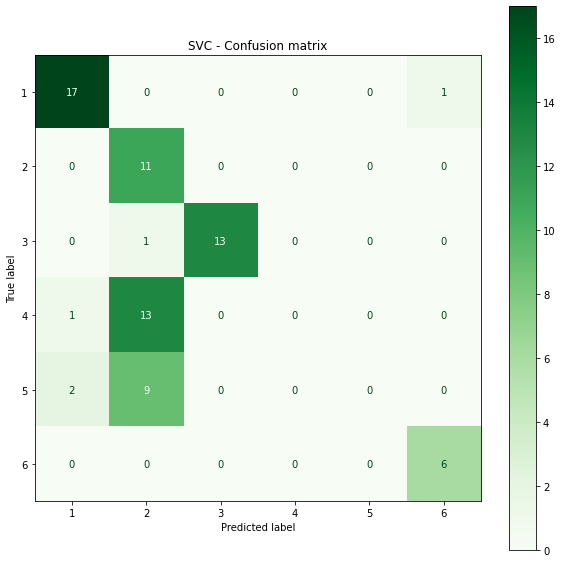

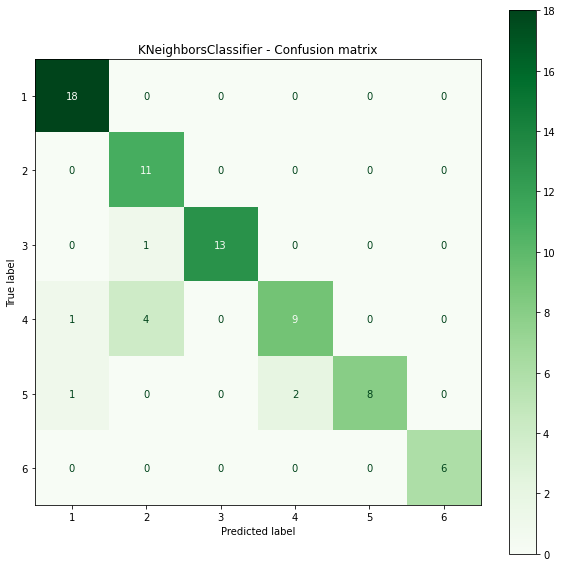

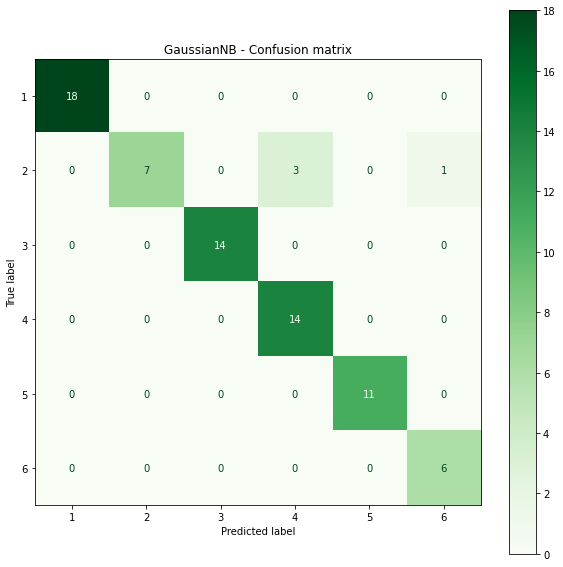

In [15]:
plot_ccm([SVC_model, KNN_model, Gaussian_model])

### Sonuç

---



Öğrettiğim modüller en başarılı 3 modülü sırasıyla GaussianNB Modülü, KNN Modülü, SVC Modülü

# **Kümeleme**

### Kümeleme metodleri tanımlama

---



In [19]:
from sklearn.cluster import  AgglomerativeClustering, KMeans

kmeans = KMeans(n_clusters=2, verbose=0)
kmeans.fit(X)

ward = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
ward.fit_predict(X)

complete = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
complete.fit_predict(X)

average = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
average.fit_predict(X)

single = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
single.fit_predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### Kümeleme metodleri çalıştırma

---



In [28]:
def evaluate_clusters(cluster_labels, true_labels):
    dominant_labels = {}
    for i in range(2):
        counts = np.zeros(8)
        indexes = np.where(cluster_labels == i)[0]
        for j in indexes:
            counts[true_labels[j]] += 1
        #print(f'counts:{counts}')
        dominant_labels[i] = counts.argmax()
        
    print(f'{{cluster_number:dominant_label}}\n{dominant_labels}') 
    count = 0
    for i in range(len(cluster_labels)):
        if dominant_labels[cluster_labels[i]] == true_labels[i]:
            count += 1
    return 100*(count/len(true_labels))

### Başarı oranı yazdırma

---



In [29]:
result = evaluate_clusters(kmeans.labels_, y)
print(f'K means accuracy:{result:.2f}%\n')

result = evaluate_clusters(ward.labels_, y)
print(f'Agglomerative Ward accuracy:{result:.2f}%\n')

result = evaluate_clusters(complete.labels_, y)
print(f'Agglomerative Complete accuracy:{result:.2f}%\n')

result = evaluate_clusters(average.labels_, y)
print(f'Agglomerative Average accuracy:{result:.2f}%\n')

result = evaluate_clusters(single.labels_, y)
print(f'Agglomerative Single accuracy:{result:.2f}%')

{cluster_number:dominant_label}
{0: 1, 1: 1}
K means accuracy:30.60%

{cluster_number:dominant_label}
{0: 1, 1: 1}
Agglomerative Ward accuracy:30.60%

{cluster_number:dominant_label}
{0: 1, 1: 6}
Agglomerative Complete accuracy:31.69%

{cluster_number:dominant_label}
{0: 1, 1: 1}
Agglomerative Average accuracy:30.60%

{cluster_number:dominant_label}
{0: 1, 1: 1}
Agglomerative Single accuracy:30.60%


### Sonuç



---


En başarılı 3 clustering methodu sırasıyla Agglomerative Average, K means, Agglomerative Ward olmuştur